In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import glob

from render_blender_main import test_render, append_path_to_model

In [2]:
test_render(
    save_dir='./bunny_views', 
    file_path='../data/bunny.obj', 
    category='', curr_model_id='', 
    width=256, height=256, num_rendering=6, max_camera_dist=1.75, 
    object_scale=2.3, generate_depth=True,
)

WARN (bgl): source/blender/python/generic/bgl.c:2654 BPyInit_bgl: 'bgl' imported without an OpenGL backend. Please update your add-ons to use the 'gpu' module. In Blender 4.0 'bgl' will be removed.
OBJ import of 'bunny.obj' took 3.7 ms


EGL Error (0x3001): EGL_NOT_INITIALIZED: EGL is not initialized, or could not be initialized, for the specified EGL display connection.

Managed to successfully fallback to surfaceless EGL rendering!

EGL Error (0x3009): EGL_BAD_MATCH: Arguments are inconsistent (for example, a valid context requires buffers not supplied by a valid surface).
EGL Error (0x3001): EGL_NOT_INITIALIZED: EGL is not initialized, or could not be initialized, for the specified EGL display connection.

Managed to successfully fallback to surfaceless EGL rendering!



Fra:1 Mem:14.36M (Peak 15.45M) | Time:00:00.31 | Syncing Light
Fra:1 Mem:14.36M (Peak 15.45M) | Time:00:00.31 | Syncing Camera
Fra:1 Mem:14.36M (Peak 15.45M) | Time:00:00.31 | Syncing RotCenter
Fra:1 Mem:14.36M (Peak 15.45M) | Time:00:00.31 | Syncing New Light
Fra:1 Mem:14.37M (Peak 15.45M) | Time:00:00.31 | Syncing bunny
Fra:1 Mem:14.82M (Peak 15.45M) | Time:00:00.35 | Rendering 1 / 64 samples
Fra:1 Mem:14.48M (Peak 15.45M) | Time:00:02.23 | Rendering 26 / 64 samples
Fra:1 Mem:14.48M (Peak 15.45M) | Time:00:03.11 | Rendering 51 / 64 samples
Fra:1 Mem:14.48M (Peak 15.45M) | Time:00:03.55 | Rendering 64 / 64 samples
Fra:1 Mem:13.70M (Peak 15.73M) | Time:00:03.58 | Compositing
Fra:1 Mem:13.70M (Peak 15.73M) | Time:00:03.58 | Compositing | Determining resolution
Fra:1 Mem:13.70M (Peak 15.73M) | Time:00:03.58 | Compositing | Initializing execution
Fra:1 Mem:14.01M (Peak 15.73M) | Time:00:03.59 | Compositing | Tile 1-1
Fra:1 Mem:13.95M (Peak 15.73M) | Time:00:03.59 | Compositing | De-initia

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import minexr

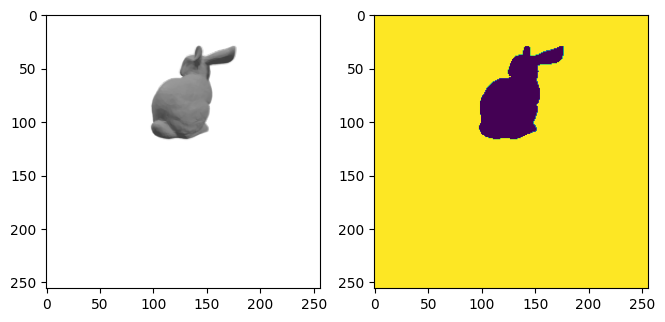

In [4]:
img = Image.open('./bunny_views/rendering/00.png')

with open('./bunny_views/rendering/00_depth_0001.exr', 'rb') as fp:
        reader = minexr.load(fp)
        depth_np = reader.select(['R'])

fig = plt.figure(figsize=(12,12))
        
plt.subplot(131)
plt.imshow(img)

plt.subplot(132)
plt.imshow(depth_np)

((256, 256, 1), <matplotlib.image.AxesImage at 0x7fd5841d23b0>)

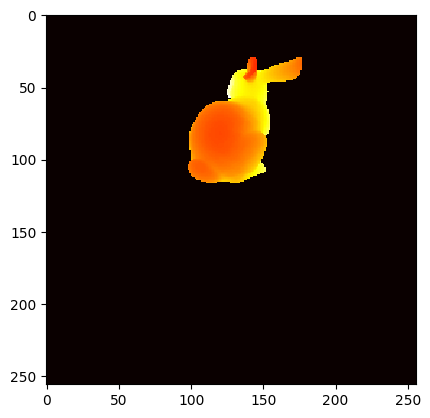

In [5]:
# Invert values on depth image
mask_background = depth_np > 1_000
arr = depth_np.copy()
arr[mask_background] = 0
arr.shape, plt.imshow(arr ** 5, cmap='hot', interpolation='nearest')